In [1]:
import torch

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import imageio
import torch
img_arr = imageio.imread('/content/drive/My Drive/data/pic1.jpg')
img_arr.shape

(1600, 1200, 3)

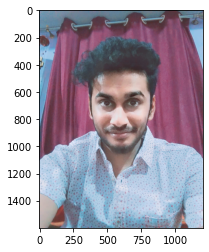

Image type: torch.FloatTensor
Image size: torch.Size([3, 1600, 1200])


In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

pil2tensor = transforms.ToTensor()
tensor2pil = transforms.ToPILImage()

pil_image = Image.open('/content/drive/My Drive/data/pic1.jpg')
rgb_image = pil2tensor(pil_image)

def plot_image(tensor):
  plt.figure()
  plt.imshow(tensor.numpy().transpose(1,2,0))
  plt.show()

plot_image(rgb_image)

print('Image type: ' + str(rgb_image.type()))
print('Image size: ' + str(rgb_image.size()))

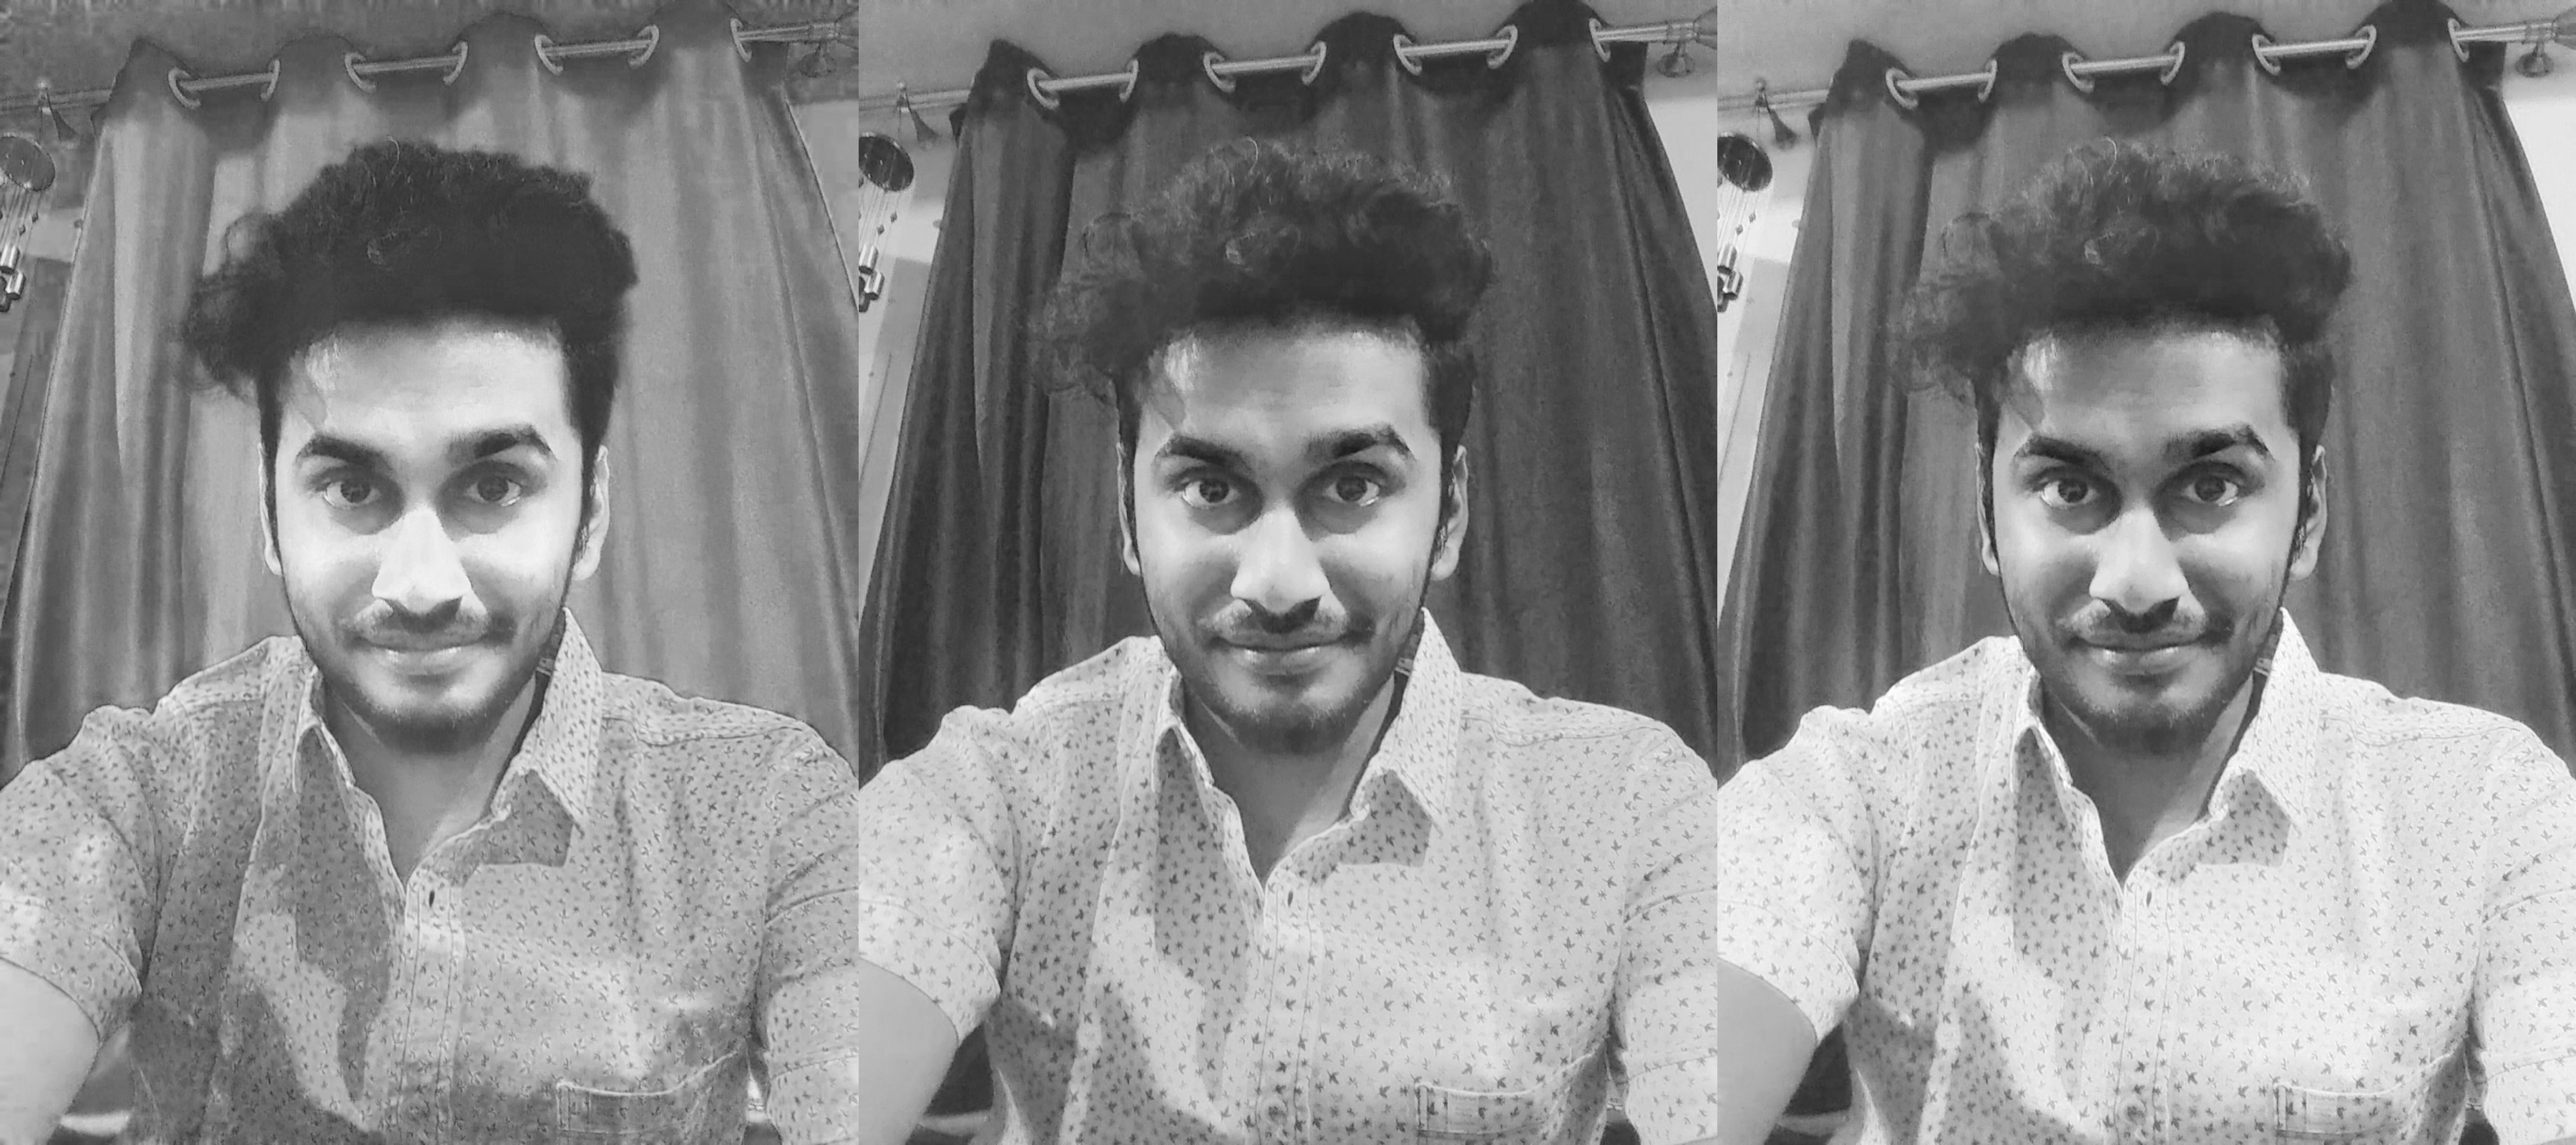

In [7]:
from io import BytesIO
import IPython.display

r_image = rgb_image[0]
g_image = rgb_image[1]
b_image = rgb_image[2]

def show_grayscale_image(tensor):
  f = BytesIO()
  a = np.uint8(tensor.mul(255).numpy())
  Image.fromarray(a).save(f,'png')
  IPython.display.display(IPython.display.Image(data = f.getvalue()))

show_grayscale_image(torch.cat((r_image,g_image,b_image),1))

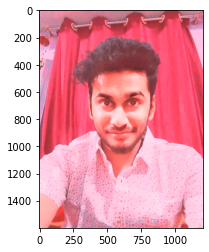

In [9]:
image_copy = rgb_image.clone()

image_copy[0] = image_copy[0].mul(2.0).clamp(0.0,1.0)
#or: image_copy[1].mul_(2).clamp_(0,1)

plot_image(image_copy)

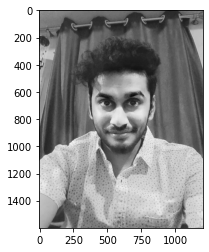

In [10]:
r_image1 = rgb_image[0]
g_image1 = rgb_image[1]
b_image1 = rgb_image[2]

grayscale_image = (r_image1 + g_image1 + b_image1).div(3.0)

def plot_grayscale_image(tensor):
  plt.figure()
  plt.imshow(tensor.numpy(),cmap='gray')
  plt.show()


plot_grayscale_image(grayscale_image)

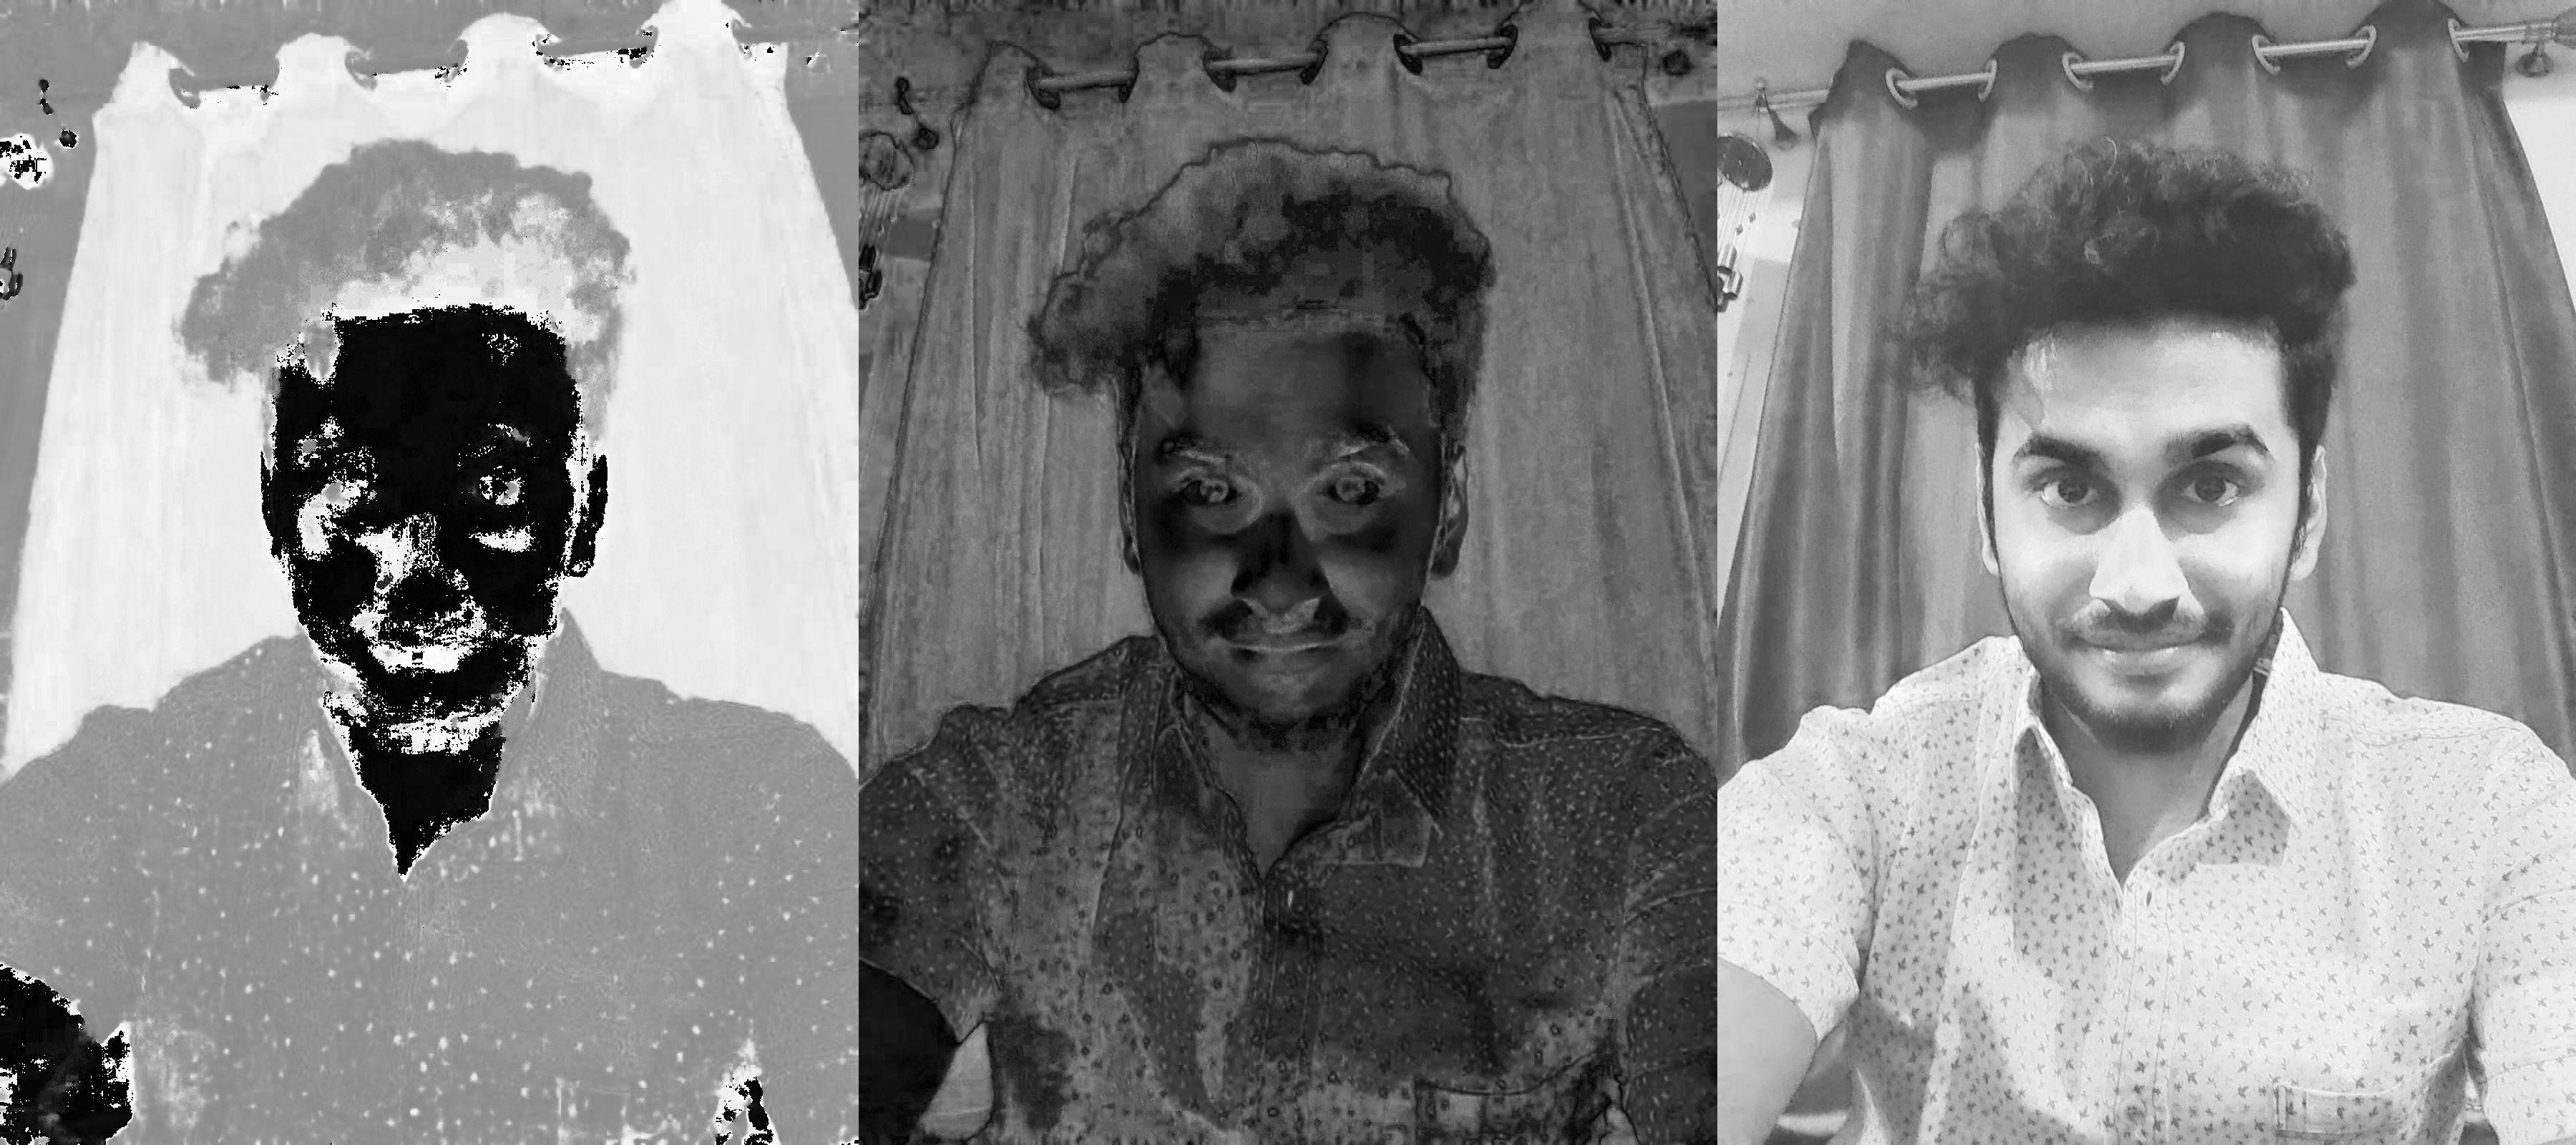

In [12]:
hsv_image = pil2tensor(pil_image.convert('HSV'))

h_image = hsv_image[0]
s_image = hsv_image[1]
v_image = hsv_image[2]

show_grayscale_image(torch.cat((h_image,s_image,v_image),1))